In [74]:
using Revise
using BiMDPs

In [75]:
dir = "case011"

"case011"

In [76]:
rgw = case_dictionary[dir]

BiMDPs.MRoverWorld.MRoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 25
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles_grid: Array{Float64}((10, 10, 25)) [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; -5.0 -5.0 … 0.0 0.0; -5.0 -5.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; -5.0 -5.0 … -5.0 0.0; … ; -5.0 -5.0 … -5.0 0.0; -5.0 -5.0 … -5.0 0.0;;; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 -5.0; … ; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 0.0]
  exit_xys: Array{Tuple{Int64, Int64}}((1,))
  measure_reward: Float64 2.0


## Plot rewards grid

In [77]:
BiMDPs.create_reward_field_evolution_gif(rgw; dir=dir)

"case011/reward_evolution.gif"

## Do one instance of a solve with Fine-grained MDP

In [78]:
using Random
rng = Random.seed!(11)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_finegrained_mdp(rgw, max_iters=100, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

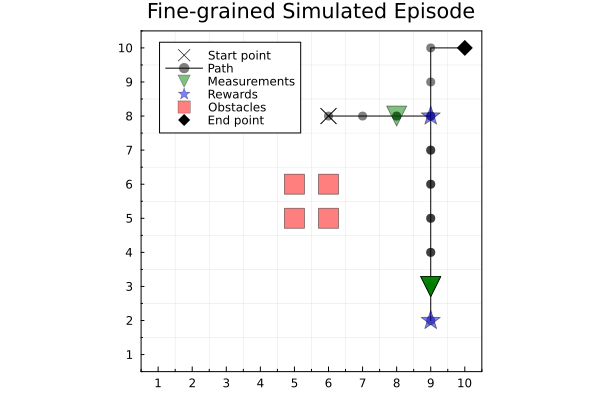

In [79]:
BiMDPs.plot_finegrained_simulated_episode(rgw, sar_history, dir=dir)

## Do one instance of a solve with Bi-Level MDP

In [80]:
using Random
rng = Random.seed!(11)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_bilevel_mdp(rgw, max_iters=200, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

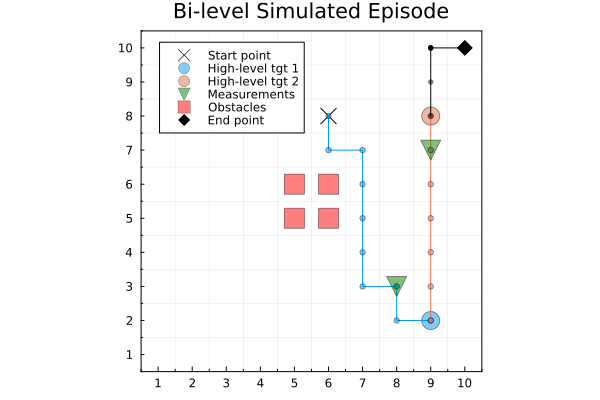

In [81]:
BiMDPs.plot_bilevel_simulated_episode(rgw, sar_history, dir=dir)

## Compare optimality vs computation time


In [82]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1], 100)])

In [83]:
results = optimality_vs_compute(rgw, [("bl_vi", [1, 5, 10, 50, 100, 150], 100), ("vi", [1, 5, 50, 100, 150], 500), ("qlearning", [50,50000], 500), ("sarsa", [50,50000], 500)])

Reward of bl_vi after 100 simulations: μ = -5.9478882266589155, σ = 4.8823509582620845
Reward of bl_vi after 100 simulations: μ = 12.950977549744914, σ = 23.069481931295815
Reward of bl_vi after 100 simulations: μ = 41.364619359959846, σ = 19.817163984533668
Reward of bl_vi after 100 simulations: μ = 49.27431909914334, σ = 12.455538075389626
Reward of bl_vi after 100 simulations: μ = 49.29874838664735, σ = 14.198223829554351
Reward of bl_vi after 100 simulations: μ = 52.452726805542504, σ = 8.843553034520056
Reward of vi after 500 simulations: μ = -0.7722029040353855, σ = 14.888985615502692
Reward of vi after 500 simulations: μ = 37.698345195180345, σ = 27.490907143960374
Reward of vi after 500 simulations: μ = 66.62195950518996, σ = 15.83474694160613
Reward of vi after 500 simulations: μ = 67.40836446764304, σ = 16.753646844913742
Reward of vi after 500 simulations: μ = 68.50716253211199, σ = 16.006290710850337
Reward of qlearning after 500 simulations: μ = -6.4759953738584315, σ = 16

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 4 entries:
  "vi"        => ([0.473303, 1.59098, 8.3096, 8.57829, 8.03439], [-0.772203, 37…
  "sarsa"     => ([0.0203526, 6.64017], [-5.31395, 37.3607], [11.5083, 20.328])
  "bl_vi"     => ([0.0347811, 0.15749, 0.322164, 0.584558, 0.630399, 0.68316], …
  "qlearning" => ([0.0123278, 6.80269], [-6.476, 62.2579], [16.2556, 13.1335])

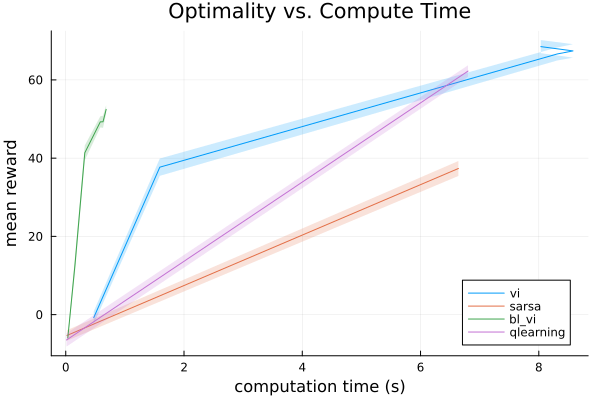

In [84]:
BiMDPs.plot_optimality_vs_compute(results, dir = dir)

## Test HL MDP

In [11]:
using POMDPs
using DiscreteValueIteration
hl_mdp = BiMDPs.HighLevelMDP(rgw)
hl_solver = ValueIterationSolver(max_iterations=100)
hl_policy = solve(hl_solver, hl_mdp);

## View stepthrough of one HL policy

In [12]:
s0 = HLRoverWorld.HLState(6,7,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

4-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(6, 7, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 15, Bool[1, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 18, Bool[1, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [13]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 105.0.


## Another example

In [14]:
s0 = HLRoverWorld.HLState(1,9,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(1, 9, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [15]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 55.0.


## From a non-starting state

In [16]:
s0 = HLRoverWorld.HLState(9,8,10,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

2-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [17]:
s0 = HLRoverWorld.HLState(9,7,9,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 7, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)